<a href="https://colab.research.google.com/github/jehee-lee/Aerospace_capstone_design/blob/main/%EC%8B%A4%EC%8A%B51)_input_size%EB%A5%BC_%EC%B6%95%EC%86%8C%ED%96%88%EC%9D%84_%EB%95%8C_%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

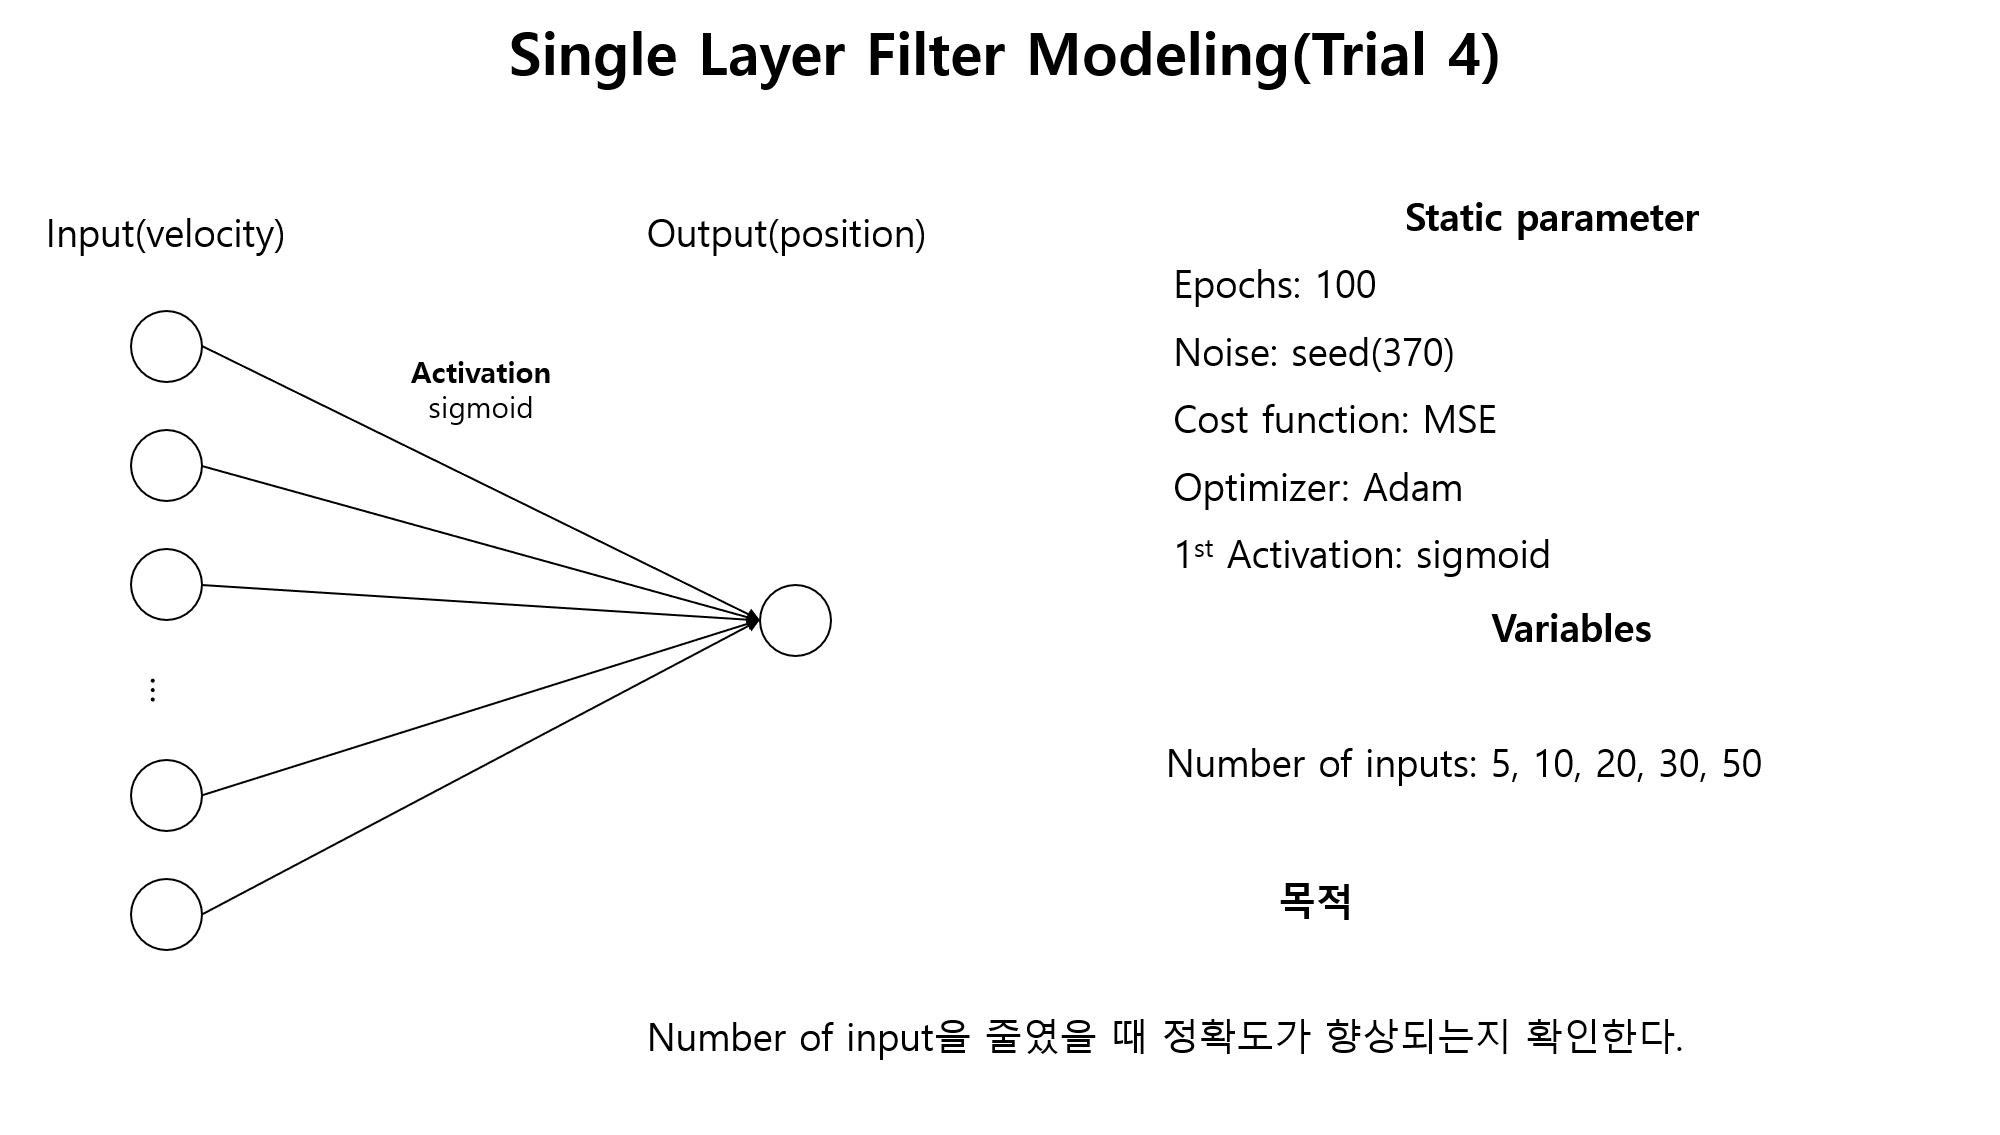

In [2]:
import numpy as np
import matplotlib.pyplot as plt


A = np.zeros((2,2))
B = np.zeros((2,1))
C = np.zeros((1,2))

#실험 조건, 데이터 사이즈 설정

N = 1000 #number of timesteps

x = np.zeros((2,N+1))
x[:,0]=[0,0]
y = np.zeros((1,N))

T=50 #time will vary from 0 to T with step delt
ts = np.linspace(0, T, N+1)
del_t = T/N # delta_t = 0.05 = 50 / 1000
gamma = 0.05 #damping

#정규분포 노이즈 생성
np.random.seed(370)
w = np.random.randn(1,N)
n = np.random.randn(1,N)

# X행렬 구성성분
A[0,0] = 1
A[0,1] = (1-gamma*del_t/2)*del_t
A[1,1] = 1 - gamma*del_t

B[0,0] = del_t**2/2
B[1,0] = del_t

C[0,0] = 1

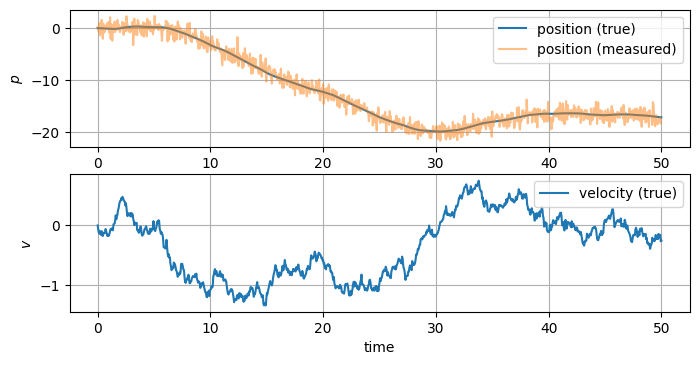

In [48]:
for t in range(N):
    y[:,t] = C.dot(x[:,t]) + n[:,t]
    x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

x_true = x.copy()

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts,x[0,:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

# 학습에 사용할 input의 사이즈 지정

DS = 50 부터 실행

<Figure size 800x300 with 0 Axes>

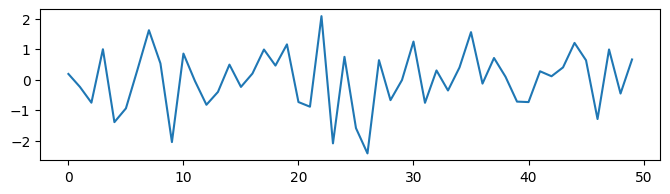

In [49]:
#학습할 데이터 사이즈(number of inputs)
DS = 50

train_input = np.zeros((1,DS))
#데이터 사이즈 만큼 계측 데이터 Y를 불러옴
plt.figure(figsize=(8,3), dpi=100)

train_input = y[:,:DS].copy()
#target 지정
train_target = np.array([x[0,DS+1]])
plt.figure(figsize=(8,2), dpi=100)
plt.plot(train_input[0,:])
plt.show()

모델 생성

filter를 모사한 1layer 모델

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS)
])

model.compile(optimizer = "adam",
              loss = 'mse',
              metrics=['mae','mse'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(train_input, train_target,epochs = 100)

Epoch 1/50
1/1 [==============================] - 0s 288ms/step - loss: 0.9055 - mae: 0.9516 - mse: 0.9055
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8300 - mae: 0.9110 - mse: 0.8300
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7578 - mae: 0.8705 - mse: 0.7578
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6891 - mae: 0.8301 - mse: 0.6891
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6239 - mae: 0.7899 - mse: 0.6239
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5622 - mae: 0.7498 - mse: 0.5622
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.5041 - mae: 0.7100 - mse: 0.5041
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4495 - mae: 0.6704 - mse: 0.4495
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3984 - mae: 0.6312 - mse: 0.3984
Epoch 10/50
1/1 [==============================] - 0s

In [50]:
input = np.zeros((1,DS))
output = np.zeros((1,1,DS))

for i in range(1000-DS):
  input = y[:,i:DS+i].copy()
  output=np.append(output,model.predict(input))
  if i%100==0:
    print("%.1f percent" %(i/(1000-DS)*100))

0.0 percent
10.5 percent
21.1 percent
31.6 percent
42.1 percent
52.6 percent
63.2 percent
73.7 percent
84.2 percent
94.7 percent


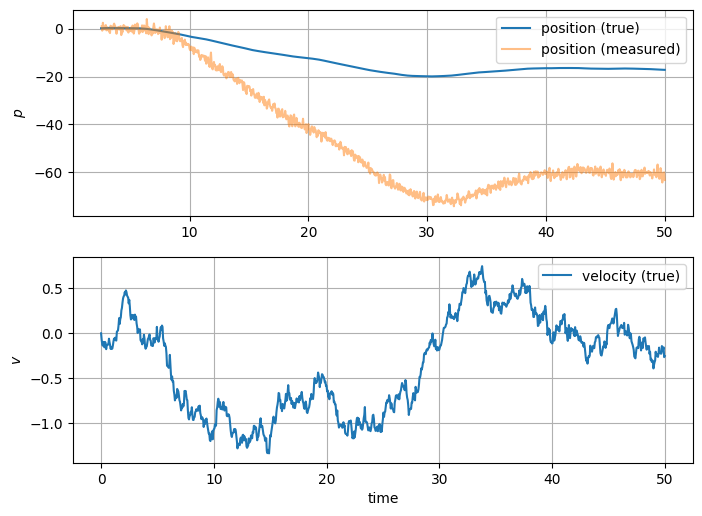

In [51]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts[DS+1:],x[0,DS+1:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[DS+2:],output[DS+1:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

#Number of input = 30

> 

<Figure size 800x300 with 0 Axes>

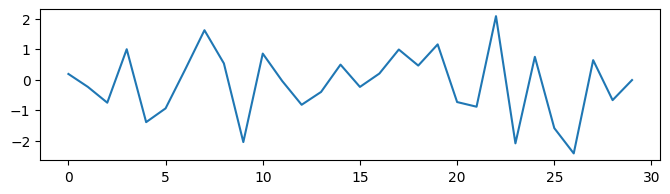

In [52]:
DS = 30
train_input = np.zeros((1,DS))
plt.figure(figsize=(8,3), dpi=100)
train_input = y[:,:DS].copy()
train_target = np.array([x[0,DS+1]])
plt.figure(figsize=(8,2), dpi=100)
plt.plot(train_input[0,:])
plt.show()

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS)
])

model.compile(optimizer = "adam",
              loss = 'mse',
              metrics=['mae','mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(train_input, train_target,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 296ms/step - loss: 0.3491 - mae: 0.5908 - mse: 0.3491
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3173 - mae: 0.5633 - mse: 0.3173
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2871 - mae: 0.5358 - mse: 0.2871
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2584 - mae: 0.5084 - mse: 0.2584
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2314 - mae: 0.4810 - mse: 0.2314
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2060 - mae: 0.4539 - mse: 0.2060
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1822 - mae: 0.4269 - mse: 0.1822
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1601 - mae: 0.4001 - mse: 0.1601
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1396 - mae: 0.3736 - mse: 0.1396
Epoch 10/100
1/1 [==========================

In [57]:
input = np.zeros((1,DS))
output = np.zeros((1,1,DS))

for i in range(1000-DS):
  input = y[:,i:DS+i].copy()
  output=np.append(output,model.predict(input))
  if i%100==0:
    print("%.1f percent" %(i/10))

0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent


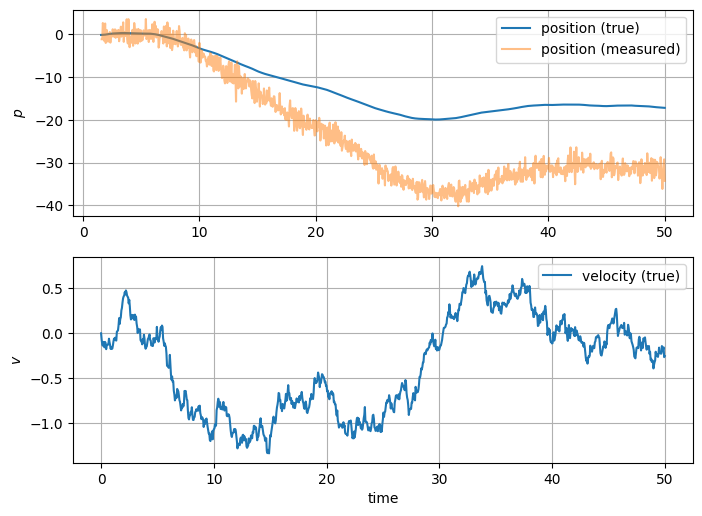

In [58]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts[DS+1:],x[0,DS+1:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[DS+2:],output[DS+1:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

# Number of inputs = 10

In [ ]:
DS = 10
train_input = np.zeros((1,DS))
plt.figure(figsize=(8,3), dpi=100)
train_input = y[:,:DS].copy()
train_target = np.array([x[0,DS+1]])
plt.figure(figsize=(8,2), dpi=100)
plt.plot(train_input[0,:])
plt.show()

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS)
])

model.compile(optimizer = "adam",
              loss = 'mse',
              metrics=['mae','mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(train_input, train_target,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 6.2149 - mae: 2.4930 - mse: 6.2149
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 6.0783 - mae: 2.4654 - mse: 6.0783
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 5.9434 - mae: 2.4379 - mse: 5.9434
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 5.8099 - mae: 2.4104 - mse: 5.8099
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 5.6782 - mae: 2.3829 - mse: 5.6782
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 5.5480 - mae: 2.3554 - mse: 5.5480
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4195 - mae: 2.3280 - mse: 5.4195
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.2927 - mae: 2.3006 - mse: 5.2927
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1675 - mae: 2.2732 - mse: 5.1675
Epoch 10/100
1/1 [==========================

In [61]:
input = np.zeros((1,DS))
output = np.zeros((1,1,DS))

for i in range(1000-DS):
  input = y[:,i:DS+i].copy()
  output=np.append(output,model.predict(input))
  if i%100==0:
    print("%.1f percent" %(i/10))

0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent


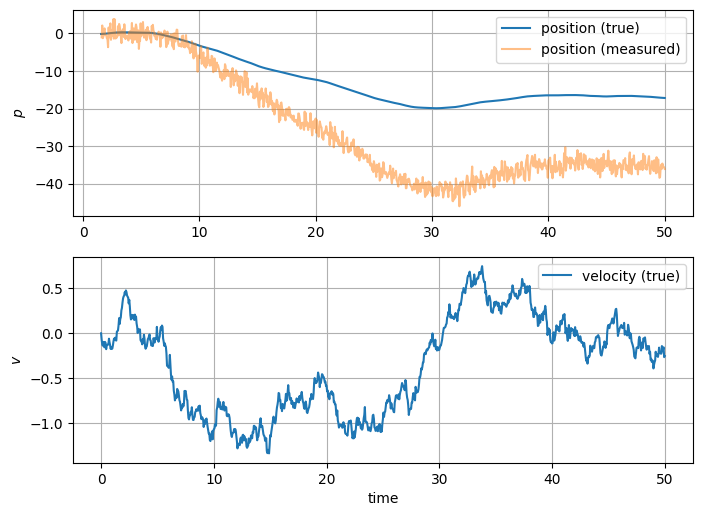

In [62]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts[DS+1:],x[0,DS+1:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[DS+2:],output[DS+1:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

# Number of inputs = 5

<Figure size 800x300 with 0 Axes>

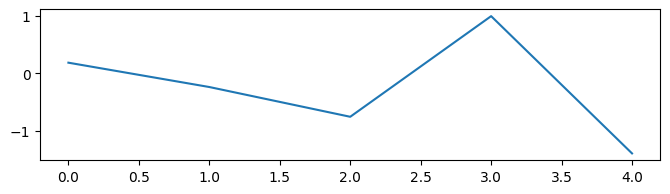

In [64]:
DS = 5
train_input = np.zeros((1,DS))
plt.figure(figsize=(8,3), dpi=100)
train_input = y[:,:DS].copy()
train_target = np.array([x[0,DS+1]])
plt.figure(figsize=(8,2), dpi=100)
plt.plot(train_input[0,:])
plt.show()

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS)
])

model.compile(optimizer = "adam",
              loss = 'mse',
              metrics=['mae','mse'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(train_input, train_target,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 0.1049 - mae: 0.3239 - mse: 0.1049
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1020 - mae: 0.3193 - mse: 0.1020
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0991 - mae: 0.3148 - mse: 0.0991
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0962 - mae: 0.3102 - mse: 0.0962
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0934 - mae: 0.3056 - mse: 0.0934
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0907 - mae: 0.3011 - mse: 0.0907
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0879 - mae: 0.2965 - mse: 0.0879
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0853 - mae: 0.2920 - mse: 0.0853
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0826 - mae: 0.2875 - mse: 0.0826
Epoch 10/100
1/1 [==========================

In [67]:
input = np.zeros((1,DS))
output = np.zeros((1,1,DS))

for i in range(1000-DS):
  input = y[:,i:DS+i].copy()
  output=np.append(output,model.predict(input))
  if i%100==0:
    print("%.1f percent" %(i/10))

0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent


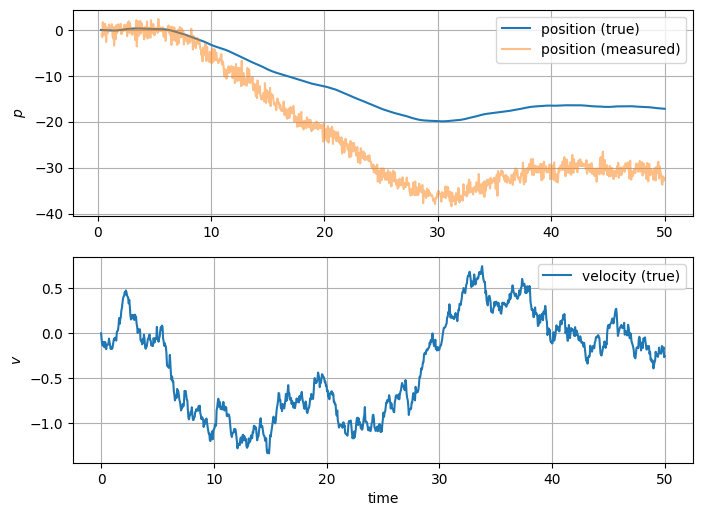

In [68]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts[DS+1:],x[0,DS+1:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[DS+2:],output[DS+1:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

Number of input이 미치는 영향은 미미한듯 하다.